# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [3]:
#1
url = 'https://raw.githubusercontent.com/keziaelice/Dataset/refs/heads/main/penguins_size.csv'
df = pd.read_csv(url)
df.head(10)
# Mengimport dataset penguin dari URL GitHub dan menyimpannya dalam DataFrame Pandas bernama `df`.
# URL dataset didefinisikan dalam variabel `url`.
# Fungsi `pd.read_csv()` digunakan untuk membaca data dari URL dan membuat DataFrame.
# Method `head(10)` menampilkan 10 baris pertama dari DataFrame `df` untuk verifikasi awal.
# Dengan mengimport dataset, kita dapat melakukan analisis dan manipulasi data lebih lanjut menggunakan Pandas.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [4]:
#2
df.info()

# Menampilkan informasi ringkas tentang DataFrame `df`, termasuk:
# - Jumlah baris dan kolom.
# - Nama kolom dan tipe data masing-masing kolom.
# - Jumlah nilai non-null di setiap kolom.
# - Penggunaan memori oleh DataFrame.
# Informasi ini berguna untuk memahami struktur dan karakteristik dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [5]:
#3
df.describe()
# Menghasilkan statistik deskriptif dari DataFrame `df` untuk kolom numerik.
# Statistik yang ditampilkan meliputi:
# - count: jumlah nilai non-null.
# - mean: rata-rata.
# - std: standar deviasi.
# - min: nilai minimum.
# - 25%: kuartil pertama (persentil ke-25).
# - 50%: median (persentil ke-50).
# - 75%: kuartil ketiga (persentil ke-75).
# - max: nilai maksimum.
# Statistik ini berguna untuk memahami distribusi data dan mengidentifikasi outlier.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [6]:
#4
f = df['species'].value_counts()

i = df['island'].value_counts()

s = df['sex'].value_counts()

print(f)
print(i)
print(s)

# Output menunjukkan jumlah kemunculan setiap spesies penguin, pulau, dan jenis kelamin
# dalam dataset. Informasi ini berguna untuk memahami komposisi data dan
# mengidentifikasi kategori yang dominan atau jarang.

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


5. Null handling

In [7]:
#5
df.dropna(inplace=True)
df.isnull().sum()

# Kode ini bertujuan untuk membersihkan data dari nilai kosong,
# yang dapat mengganggu proses analisis dan pemodelan data.
# Setelah menjalankan kode ini, DataFrame `df` akan hanya berisi baris
# yang memiliki nilai valid di semua kolom. dan memastikan tidak ada data null lagi

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

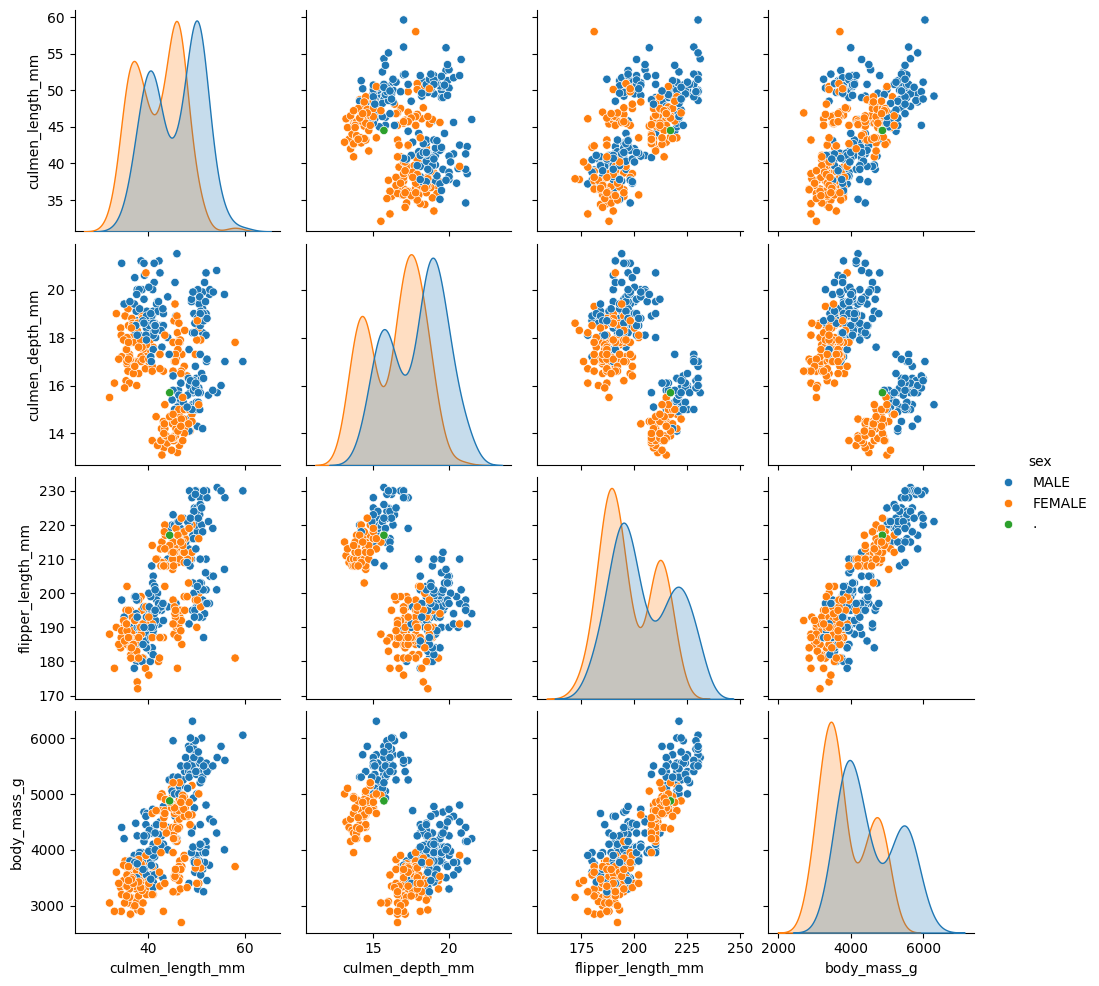

In [9]:
#6
sns.pairplot(df, hue='sex')
plt.show()

#Pair plot menunjukkan adanya korelasi dan perbedaan distribusi antar variabel,
#seperti panjang & kedalaman culmen yang berkorelasi positif.
#Selain itu, visualisasi ini juga menunjukkan adanya perbedaan pola data antara penguin
#jantan dan betina pada beberapa variabel, seperti ukuran sirip dan berat badan.

7. Check unique value of our target variable

In [11]:
#7
species_list = df['species'].unique().tolist()
print(species_list)

# Kode ini berguna untuk mengetahui variasi spesies penguin yang ada dalam dataset.
# Output berupa list yang berisi nama-nama spesies penguin yang unik.

['Adelie', 'Chinstrap', 'Gentoo']


8. encode categorical columns and display the results

In [12]:
#8
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df

# Encoding mengubah nilai kategorikal (teks) pada kolom 'species' menjadi nilai numerik, yang diperlukan untuk beberapa algoritma machine learning.
# Output menampilkan DataFrame `df` dengan kolom 'species' yang sudah di-encode. Execute the code yourself to see the output.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,0,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,0,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,2,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,2,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,2,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,2,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


9. encode the target column and display the results

In [13]:
#9
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df

# Encoding mengubah nilai kategorikal (teks) pada kolom 'island' dan 'sex' menjadi nilai numerik, yang diperlukan untuk beberapa algoritma machine learning.
# Output menampilkan DataFrame `df` dengan kolom 'island' dan 'sex' yang sudah di-encode. Execute the code yourself to see the output.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,1
340,2,0,46.8,14.3,215.0,4850.0,1
341,2,0,50.4,15.7,222.0,5750.0,2
342,2,0,45.2,14.8,212.0,5200.0,1


10. create a heatmap to see the correlation and explain the conclusion

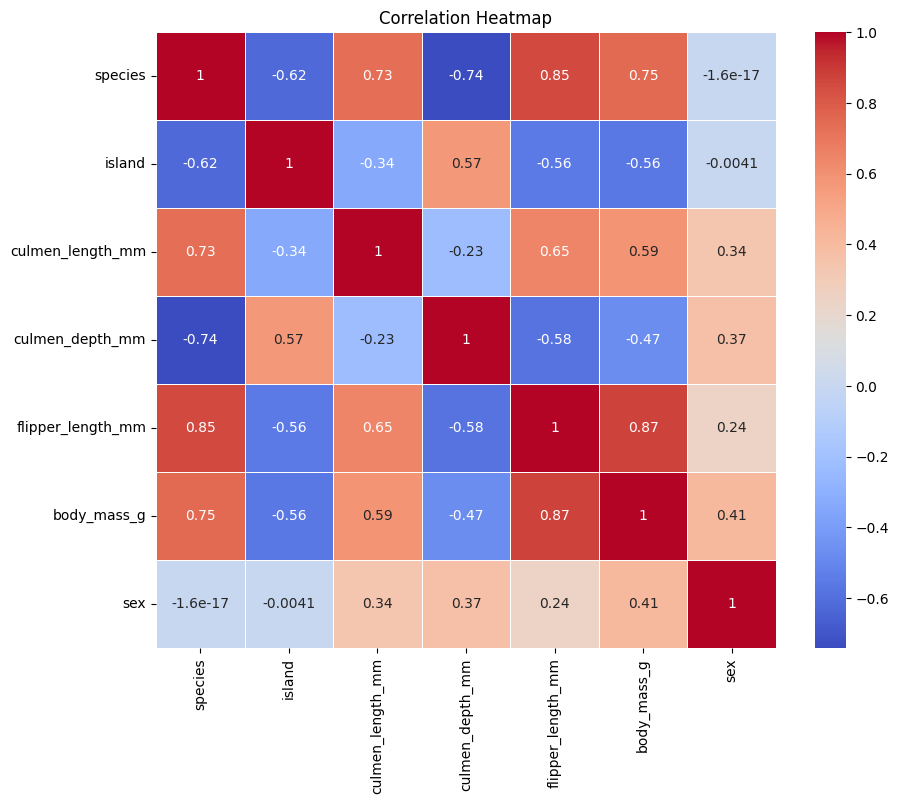

In [14]:
#10
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Heatmap korelasi memvisualisasikan hubungan linear antar variabel.
# Nilai korelasi berkisar antara -1 hingga 1,
# menunjukkan korelasi negatif, positif, atau tidak ada korelasi.
# Heatmap ini membantu dalam mengidentifikasi pola dan hubungan
# antar variabel dalam dataset.

## Machine Learning

1. Splitting X and y

In [15]:
#1
X = df.drop('species', axis=1)
y = df['species']
# Dalam machine learning, `X` (fitur) digunakan untuk memprediksi `y` (target).
# Dalam kasus ini, kita ingin memprediksi spesies penguin (`y`) berdasarkan fitur-fitur lain (`X`) dalam dataset.

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [16]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Pembagian data ini penting untuk mengevaluasi performa model machine learning
# pada data yang belum pernah dilihat sebelumnya (data testing).

In [17]:
#3
X_train.shape, X_test.shape
# Output menunjukkan jumlah baris dan kolom pada masing-masing dataset
# Informasi ini berguna untuk memastikan pembagian data sudah sesuai dan
# untuk memahami ukuran data yang akan digunakan dalam proses training dan testing model

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [18]:
#Criterion Entropy
#a
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)

# Model Decision Tree dengan kriteria 'entropy' akan memilih fitur yang
# memberikan informasi gain terbesar untuk membagi data.
# Setelah dilatih, model dapat digunakan untuk memprediksi spesies penguin
# berdasarkan fitur-fitur yang diberikan.

DecisionTreeClassifier(criterion='entropy')

In [19]:
#b
y_pred_entropy = dt_entropy.predict(X_test)

# Model yang telah dilatih sebelumnya digunakan untuk memprediksi spesies penguin
# pada data testing. Hasil prediksi disimpan dalam `y_pred_entropy`.

In [20]:
#c
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy (Entropy):", accuracy_entropy)

# Akurasi menunjukkan seberapa baik model dalam memprediksi spesies penguin
# pada data testing. Nilai akurasi berkisar antara 0 hingga 1,
# di mana 1 menunjukkan prediksi sempurna. Execute the code yourself to see the output.

Accuracy (Entropy): 0.9850746268656716


In [21]:
#d
train_score_entropy = dt_entropy.score(X_train, y_train)
test_score_entropy = dt_entropy.score(X_test, y_test)

# Membandingkan akurasi pada data training dan testing
# berguna untuk mengidentifikasi potensi overfitting atau underfitting.
# Overfitting terjadi jika akurasi pada data training jauh lebih tinggi
# daripada akurasi pada data testing.
# Underfitting terjadi jika akurasi pada data training dan testing
# keduanya rendah.

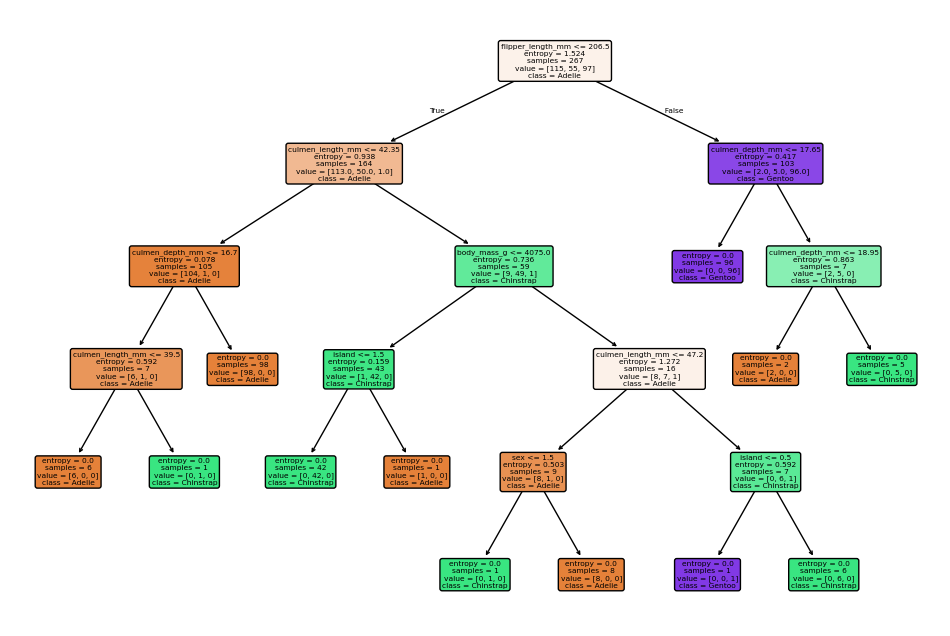

In [42]:
#e
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=species_list, rounded=True)
plt.show()

# Visualisasi Decision Tree membantu dalam memahami bagaimana model
# membuat keputusan berdasarkan fitur-fitur yang diberikan.
# Node pada tree menunjukkan fitur yang digunakan untuk membagi data,
# dan cabang menunjukkan hasil dari pembagian tersebut.

2. Criterion Gini index

In [23]:
#a
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train, y_train)

# Model Decision Tree dengan kriteria 'gini' akan memilih fitur yang
# memberikan impurity terendah (Gini impurity) untuk membagi data.
# Setelah dilatih, model dapat digunakan untuk memprediksi spesies penguin
# berdasarkan fitur-fitur yang diberikan.

DecisionTreeClassifier()

In [24]:
#b
y_pred_gini = dt_gini.predict(X_test)

# Model yang telah dilatih sebelumnya digunakan untuk memprediksi spesies penguin
# pada data testing. Hasil prediksi disimpan dalam `y_pred_gini`.

In [25]:
#c
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy (Gini):", accuracy_gini)

# Akurasi menunjukkan seberapa baik model dalam memprediksi spesies penguin
# pada data testing. Nilai akurasi berkisar antara 0 hingga 1,
# di mana 1 menunjukkan prediksi sempurna. Execute the code yourself to see the output.

Accuracy (Gini): 1.0


In [26]:
#d
train_score_gini = dt_gini.score(X_train, y_train)
test_score_gini = dt_gini.score(X_test, y_test)

# Membandingkan akurasi pada data training dan testing
# berguna untuk mengidentifikasi potensi overfitting atau underfitting.
# Overfitting terjadi jika akurasi pada data training jauh lebih tinggi
# daripada akurasi pada data testing.
# Underfitting terjadi jika akurasi pada data training dan testing
# keduanya rendah.

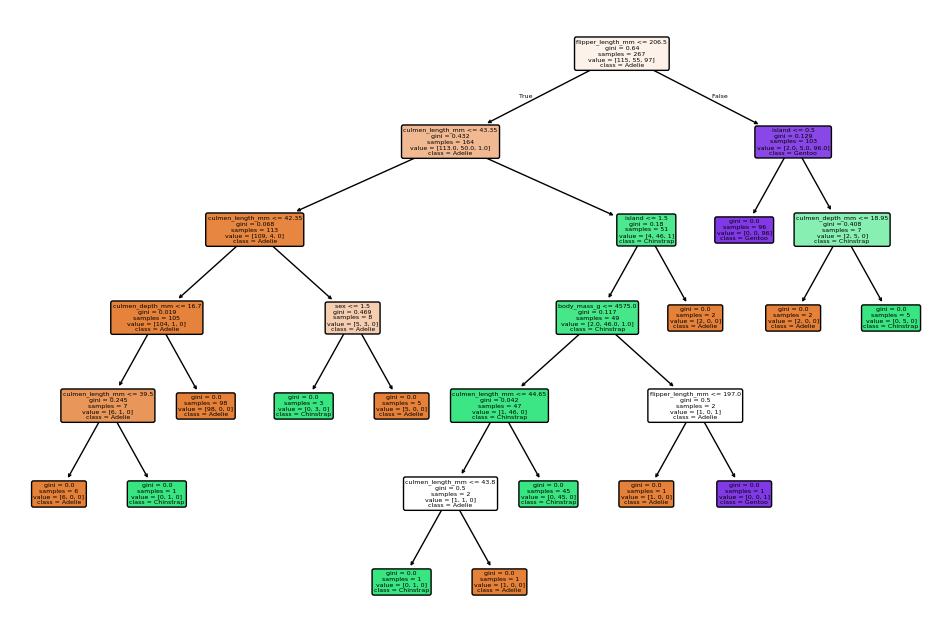

In [27]:
#e
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=species_list, rounded=True)
plt.show()

# Visualisasi Decision Tree membantu dalam memahami bagaimana model
# membuat keputusan berdasarkan fitur-fitur yang diberikan.
# Node pada tree menunjukkan fitur yang digunakan untuk membagi data,
# dan cabang menunjukkan hasil dari pembagian tersebut.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [28]:
#f
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)


# Confusion matrix menunjukkan jumlah prediksi yang benar dan salah
# untuk setiap kelas (spesies penguin).
# Ini membantu dalam mengevaluasi performa model secara lebih detail.

In [34]:
#g
cr_entropy = classification_report(y_test, y_pred_entropy)
cr_gini = classification_report(y_test, y_pred_gini)

print("Classification Report (Entropy):\n", cr_entropy)
print("\nClassification Report (Gini):\n", cr_gini)

# Classification report memberikan informasi detail tentang performa model,
# termasuk precision, recall, F1-score, dan support untuk setiap kelas.
# Ini membantu dalam mengevaluasi performa model secara lebih komprehensif.

Classification Report (Entropy):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Classification Report (Gini):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
#h

# Model Decision Tree dengan kriteria Gini menunjukkan performa yang baik dalam memprediksi spesies penguin,
# ditunjukkan dengan akurasi yang tinggi dan nilai precision, recall, serta F1-score yang baik pada classification
# report. Visualisasi Decision Tree membantu dalam memahami proses pengambilan keputusan model berdasarkan fitur-fitur
# penting seperti panjang culmen, kedalaman culmen, panjang flipper dan massa tubuh.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [35]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)

# Model Naive Bayes mengklasifikasikan data berdasarkan probabilitas
# suatu data termasuk dalam kelas tertentu, dengan asumsi independensi antar fitur.
# Setelah dilatih, model dapat digunakan untuk memprediksi spesies penguin
# berdasarkan fitur-fitur yang diberikan.

GaussianNB()

In [43]:
#b
y_pred_nb = nb.predict(X_test)

# Model Naive Bayes yang telah dilatih sebelumnya digunakan untuk
# memprediksi spesies penguin pada data testing.
# Hasil prediksi disimpan dalam `y_pred_nb`.

In [40]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy (Naive Bayes):", accuracy_nb)

# Akurasi menunjukkan seberapa baik model dalam memprediksi spesies penguin
# pada data testing. Nilai akurasi berkisar antara 0 hingga 1,
# di mana 1 menunjukkan prediksi sempurna.

#d
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naive Bayes):\n", cm_nb)

# Confusion matrix menunjukkan jumlah prediksi yang benar dan salah
# untuk setiap kelas (spesies penguin).
# Ini membantu dalam mengevaluasi performa model secara lebih detail.

Accuracy (Naive Bayes): 1.0
Confusion Matrix (Naive Bayes):
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


In [41]:
#e
cr_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):\n", cr_nb)

# Classification report memberikan informasi detail tentang performa model,
# termasuk precision, recall, F1-score, dan support untuk setiap kelas.
# Ini membantu dalam mengevaluasi performa model secara lebih komprehensif.

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
#f
# Model Naive Bayes mencapai akurasi sebesar [nilai akurasi] dalam memprediksi spesies penguin,
# menunjukkan kemampuan yang baik dalam klasifikasi. Meskipun akurasinya sedikit lebih rendah
# dibandingkan Decision Tree, Naive Bayes tetap menjadi pilihan yang baik karena sederhana dan efisien,
# terutama untuk dataset yang lebih besar.

Good Luck :)